<a href="https://colab.research.google.com/github/alslmini/Machine-Learning-Programming/blob/main/20251028%EC%8B%A4%EC%8A%B5/TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [10]:
# 1. 데이터 로드 및 데이터 수정
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine-Learning/20251028/TSLA.csv')
df_selected = df[['Open', 'High', 'Low', 'Close']]

target = df_selected['Close'].values.reshape(-1, 1)

features = df_selected[['Open', 'High', 'Low']].values

In [11]:
#2. 정규화
combined_data = np.concatenate((features, target), axis=1)

scaler = MinMaxScaler()
combined_scaled = scaler.fit_transform(combined_data)

features_scaled = combined_scaled[:, :-1]
target_scaled = combined_scaled[:, -1].reshape(-1, 1)

In [12]:
#3. 시퀀스 정의
window = 12
X, y = [], []
combined_scaled_for_sequences = np.concatenate((features_scaled, target_scaled), axis=1)

for i in range(len(combined_scaled_for_sequences) - window):
    X.append(combined_scaled_for_sequences[i : i + window])
    y.append(combined_scaled_for_sequences[i + window, -1])

X, y = np.array(X), np.array(y)

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (2944, 12, 4)
Shape of y: (2944,)


In [13]:
# 4. 데이터 분할
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (2355, 12, 4)
Shape of X_test: (589, 12, 4)
Shape of y_train: (2355,)
Shape of y_test: (589,)


In [14]:
# 5. RNN 모델 정의 및 훈련
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.SimpleRNN(50),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_history = rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0107 - val_loss: 7.5080e-05
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2001e-05 - val_loss: 5.9518e-05
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4724e-05 - val_loss: 5.1834e-05
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3398e-05 - val_loss: 4.3887e-05
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2463e-05 - val_loss: 3.5454e-05
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.3909e-06 - val_loss: 2.8678e-05
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.6385e-06 - val_loss: 2.3357e-05
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.0691e-06 - val_loss: 1.8459e-05
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.7436e-06 - val_loss: 1.4992e-05
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.2146e-06 - val_loss: 1.2338e-05
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3503e-06 - val_l

In [15]:
# 6. LSTM 모델 정의 및 훈련
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.7248e-04 - val_loss: 1.1661e-05
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.2845e-06 - val_loss: 1.1018e-05
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.1941e-06 - val_loss: 1.0857e-05
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1897e-06 - val_loss: 1.0943e-05
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3037e-06 - val_loss: 1.0441e-05
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.2502e-06 - val_loss: 1.0239e-05
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0212e-06 - val_loss: 1.0898e-05
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.8869e-06 - val_loss: 9.8995e-06
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.3379e-06 - val_loss: 9.5578e-06
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.6596e-06 - val_loss: 9.8090e-06
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss

In [16]:
from sklearn.metrics import mean_squared_error

# RNN 모델 예측 및 MSE 계산
rnn_pred = rnn_model.predict(X_test)
rnn_mse = mean_squared_error(y_test, rnn_pred)
print(f'RNN Model MSE: {rnn_mse}')

# LSTM 모델 예측 및 MSE 계산
lstm_pred = lstm_model.predict(X_test)
lstm_mse = mean_squared_error(y_test, lstm_pred)
print(f'LSTM Model MSE: {lstm_mse}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
RNN Model MSE: 0.006491329521479296
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
LSTM Model MSE: 0.003971610484022175


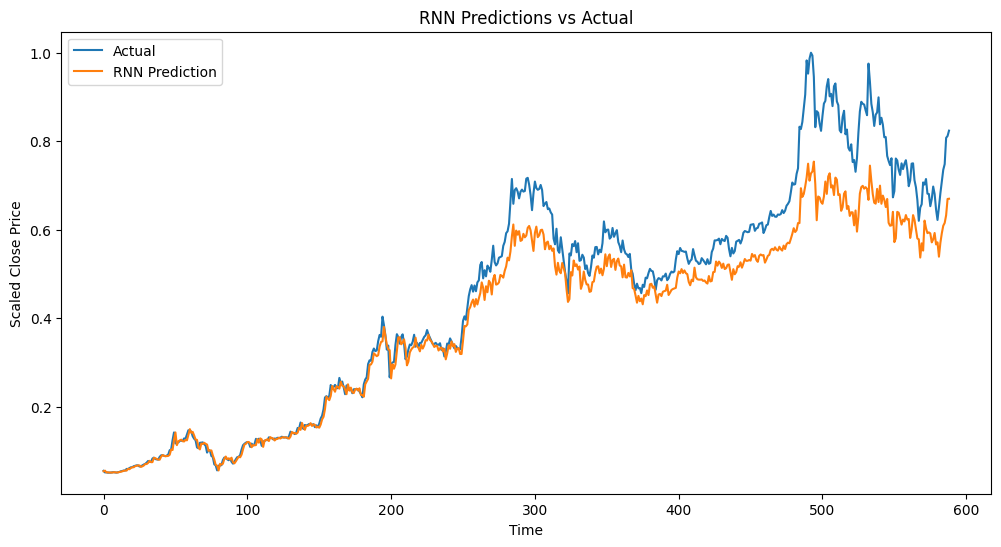

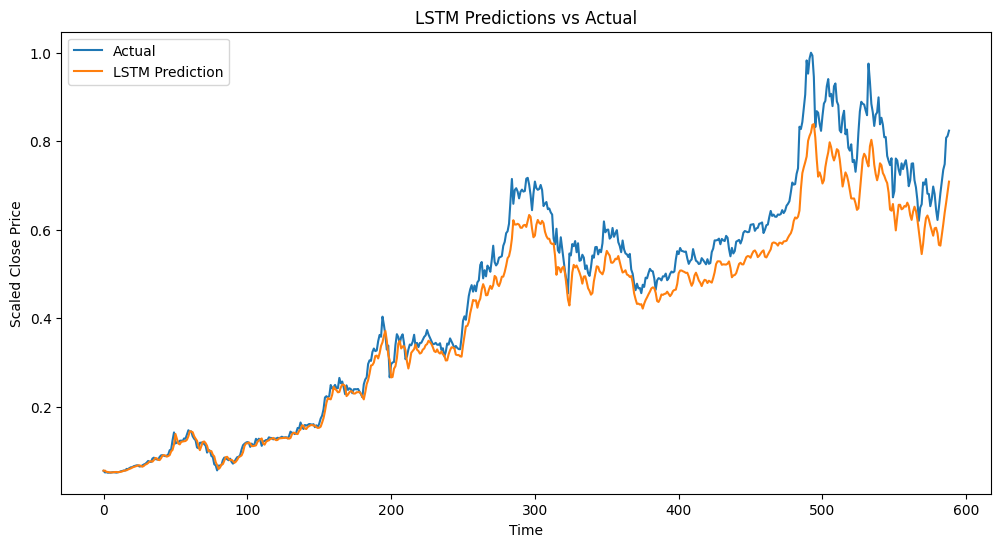

In [17]:
# 8. 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(rnn_pred, label='RNN Prediction')
plt.title('RNN Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(lstm_pred, label='LSTM Prediction')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


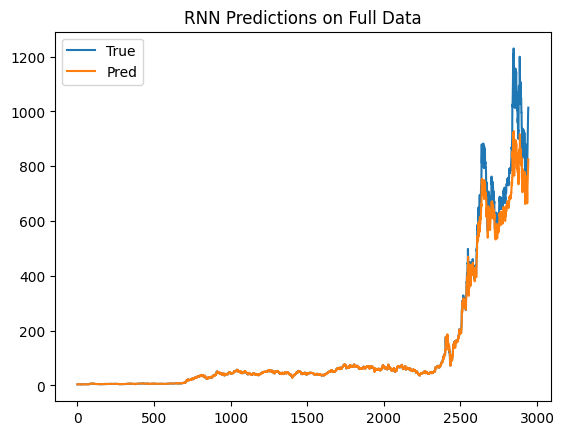

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


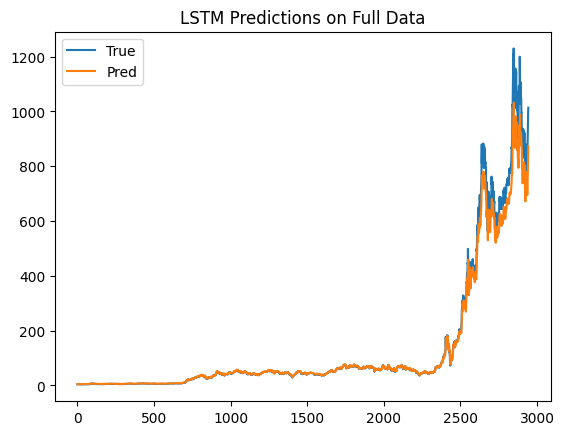

In [21]:
pred_rnn = rnn_model.predict(X)
plt.plot(target_scaler.inverse_transform(y.reshape(-1, 1)), label='True')
plt.plot(target_scaler.inverse_transform(pred_rnn), label='Pred')
plt.title('RNN Predictions on Full Data')
plt.legend(); plt.show()

pred_lstm = lstm_model.predict(X)
plt.plot(target_scaler.inverse_transform(y.reshape(-1, 1)), label='True')
plt.plot(target_scaler.inverse_transform(pred_lstm), label='Pred')
plt.title('LSTM Predictions on Full Data')
plt.legend(); plt.show()